In [10]:
#Import packages:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, r2_score, classification_report
from sklearn.datasets import make_classification 
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

In [11]:
#import data
redimportedData ='red_wine_processed.csv'
red_wine = pd.read_csv(redimportedData, index_col = False)
red_wine = red_wine.drop(columns='Unnamed: 0', axis = 1)
whiteimportedData ='white_wine_processed.csv'
white_wine = pd.read_csv(whiteimportedData, index_col = False)
white_wine = white_wine.drop(columns='Unnamed: 0', axis = 1)

In [12]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [14]:
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_wine.drop(columns='qual_bin'), 
                                                    red_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_wine.drop(columns='qual_bin'), 
                                                    white_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)

In [15]:
red_X_train.shape, red_X_test.shape

((1119, 11), (480, 11))

In [16]:
white_X_train.shape, white_X_test.shape

((3428, 11), (1470, 11))

I apply different ML models below and evaluate their performance for both red and white wine test data and tabulate the scores and put them in a confusion matrix. I also perform a gridsearch hyperparameter tuning for each model as well determine the ROC_AUC scores. The Logistic Regression model appears to be the best for both red and white wines, so I perform a ROC curve for it, followed by the Classification Reports.

In [22]:
# Logistic Regression - build param grid features
C = [0.001,0.01,0.1,1,10,100]
penalty = ['l1', 'l2']
solver = ['liblinear']

param_grid = {'C' : C, 'penalty' : penalty, 'solver' : solver}
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}


In [23]:
# Logistic Regression - GridSearchCV
rf = LogisticRegression()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc')
red_gs = gs.fit(red_X_train, red_y_train)
white_gs = gs.fit(white_X_train, white_y_train)

print('Red:')
print(red_gs.best_estimator_)
print(red_gs.best_score_)

print('White:')
print(white_gs.best_estimator_)
print(white_gs.best_score_)

Red:
LogisticRegression(C=100, penalty='l1', solver='liblinear')
0.7738198329334467
White:
LogisticRegression(C=100, penalty='l1', solver='liblinear')
0.7738198329334467


In [24]:
# Logistic Regression  - Fitting the model with the optimal hyperparameters
rf = LogisticRegression(solver='liblinear', C=100, random_state=0, penalty='l1')
rf.fit(red_X_train, red_y_train)
red_y_pred = rf.predict(red_X_test)
red_acc = accuracy_score(red_y_test, red_y_pred)
red_cv = cross_val_score(rf, red_X_test, red_y_test, scoring = 'roc_auc').mean()
print('Red:')
print("Accuracy Score: ", red_acc)
print("Cross Value Score: ", red_cv)
print(" ")
print('White:')
rf.fit(white_X_train, white_y_train)
white_y_pred = rf.predict(white_X_test)
white_acc = accuracy_score(white_y_test, white_y_pred)
white_cv = cross_val_score(rf, white_X_test, white_y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", white_acc)
print("Cross Value Score: ", white_cv)

Red:
Accuracy Score:  0.8708333333333333
Cross Value Score:  0.8576655052264808
 
White:
Accuracy Score:  0.817687074829932
Cross Value Score:  0.8057712182358632


In [75]:
# Logistic Regression - ROC-AUC Score
red_y_scores_rf = rf.predict_proba(red_X_test)
red_y_scores_rf = red_y_scores_rf[:,1]
red_auroc = roc_auc_score(red_y_test, red_y_scores_rf)
print("Red ROC-AUC Score:", red_auroc)

white_y_scores_rf = rf.predict_proba(white_X_test)
white_y_scores_rf = white_y_scores_rf[:,1]
white_auroc = roc_auc_score(white_y_test, white_y_scores_rf)
print("White ROC-AUC Score:", white_auroc)

Red ROC-AUC Score: 0.844459930313589
White ROC-AUC Score: 0.8082795431976167


Logistic Regression - Red wine


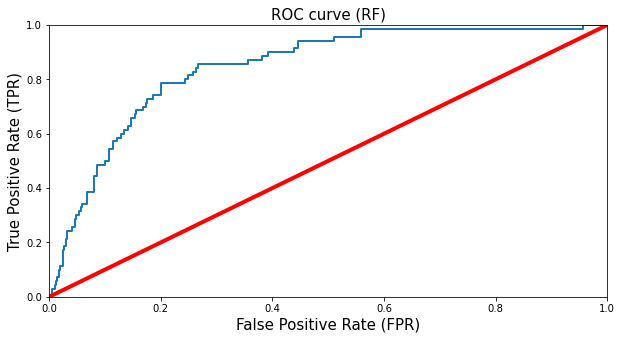

In [76]:

# Logistic Regression - ROC Curve - Red 
false_positive_rate, true_positive_rate, thresholds = roc_curve(red_y_test, red_y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

print('Logistic Regression - Red wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("red_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .25

Logistic Regression - White wine


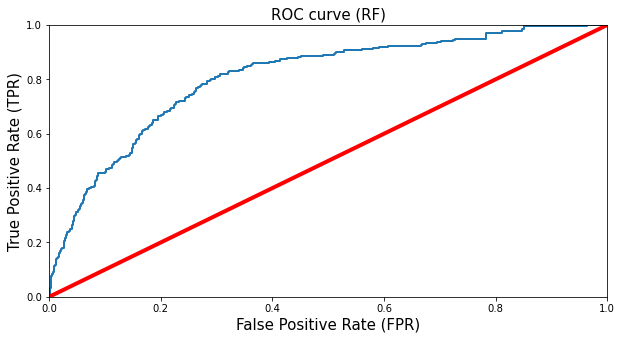

In [77]:
# Logistic Regression - ROC Curve - White 
false_positive_rate, true_positive_rate, thresholds = roc_curve(white_y_test, white_y_scores_rf)
print('Logistic Regression - White wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("white_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .2

In [78]:
# Logistic Regression - Predict using the model and show confusion matrix:
print('Red Confusion Matrix')
red_y_pred = rf.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = rf.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[400  10]
 [ 62   8]]
White Confusion Matrix
[[1114   52]
 [ 215   89]]


In [79]:
# Random Forest - build param grid features
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_sample_split = [2, 5]
min_sample_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators' : n_estimators, 
              'max_features' : max_features, 
              'max_depth' : max_depth, 
              'min_samples_split' : min_sample_split, 
              'min_samples_leaf' : min_sample_leaf, 
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [80]:
# RandomForestClassifier - GridSearchCV
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
red_gs = gs.fit(red_X_train, red_y_train)
white_gs = gs.fit(white_X_train, white_y_train)

print('Red:')
print(red_gs.best_estimator_)
print(red_gs.best_score_)

print('White:')
print(white_gs.best_estimator_)
print(white_gs.best_score_)


Red:
RandomForestClassifier(max_depth=4, n_estimators=80)
0.8251774127138255
White:
RandomForestClassifier(max_depth=4, n_estimators=80)
0.8251774127138255


In [81]:
# RandomForestClassifier - Fitting the Random forest model with the optimal hyperparameters
rf = RandomForestClassifier(n_estimators = 48, max_features = 'sqrt' , max_depth = 4, min_samples_split = 5, bootstrap = False)
rf.fit(red_X_train, red_y_train)
red_y_pred = rf.predict(red_X_test)
red_acc = accuracy_score(red_y_test, red_y_pred)
red_cv = cross_val_score(rf, red_X_test, red_y_test, scoring = 'roc_auc').mean()
print('Red:')
print("Accuracy Score: ", red_acc)
print("Cross Value Score: ", red_cv)
print(" ")
print('White:')
rf.fit(white_X_train, white_y_train)
white_y_pred = rf.predict(white_X_test)
white_acc = accuracy_score(white_y_test, white_y_pred)
white_cv = cross_val_score(rf, white_X_test, white_y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", white_acc)
print("Cross Value Score: ", white_cv)

Red:
Accuracy Score:  0.8729166666666667
Cross Value Score:  0.8790940766550523
 
White:
Accuracy Score:  0.8122448979591836
Cross Value Score:  0.8324227669263904


In [82]:
# RandomForestClassifier - ROC-AUC Score
red_y_scores_rf = rf.predict_proba(red_X_test)
red_y_scores_rf = red_y_scores_rf[:,1]
red_auroc = roc_auc_score(red_y_test, red_y_scores_rf)
print("Red ROC-AUC Score:", red_auroc)

white_y_scores_rf = rf.predict_proba(white_X_test)
white_y_scores_rf = white_y_scores_rf[:,1]
white_auroc = roc_auc_score(white_y_test, white_y_scores_rf)
print("White ROC-AUC Score:", white_auroc)

Red ROC-AUC Score: 0.8076306620209059
White ROC-AUC Score: 0.8548470366525232


In [83]:
# RandomForestClassifier - Predict using the model and show confusion matrix:
print('Red Confusion Matrix')
red_y_pred = rf.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = rf.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[409   1]
 [ 70   0]]
White Confusion Matrix
[[1146   20]
 [ 256   48]]


In [84]:
# KNeighborsClassifier - build param grid features
n_neighbors = [3, 5, 7, 10, 100, 400]
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors' : n_neighbors, 'weights' : weights, 'algorithm' : algorithm}
print(param_grid)

{'n_neighbors': [3, 5, 7, 10, 100, 400], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}


In [85]:
# KNeighborsClassifier - GridSearchCV
rf = KNeighborsClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc')
red_gs = gs.fit(red_X_train, red_y_train)
white_gs = gs.fit(white_X_train, white_y_train)

print('Red:')
print(red_gs.best_estimator_)
print(red_gs.best_score_)

print('White:')
print(white_gs.best_estimator_)
print(white_gs.best_score_)

Red:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=100, weights='distance')
0.8265460260880626
White:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=100, weights='distance')
0.8265460260880626


In [86]:
# KNeighborsClassifier - Fitting the model with the optimal hyperparameters
rf = KNeighborsClassifier(n_neighbors=100, weights='distance', algorithm='ball_tree')
rf.fit(red_X_train, red_y_train)
red_y_pred = rf.predict(red_X_test)
red_acc = accuracy_score(red_y_test, red_y_pred)
red_cv = cross_val_score(rf, red_X_test, red_y_test, scoring = 'roc_auc').mean()
print('Red:')
print("Accuracy Score: ", red_acc)
print("Cross Value Score: ", red_cv)
print(" ")
print('White:')
rf.fit(white_X_train, white_y_train)
white_y_pred = rf.predict(white_X_test)
white_acc = accuracy_score(white_y_test, white_y_pred)
white_cv = cross_val_score(rf, white_X_test, white_y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", white_acc)
print("Cross Value Score: ", white_cv)

Red:
Accuracy Score:  0.8895833333333333
Cross Value Score:  0.7522648083623693
 
White:
Accuracy Score:  0.8551020408163266
Cross Value Score:  0.7760132271266443


In [87]:
# KNeighborsClassifier - ROC-AUC Score
red_y_scores_rf = rf.predict_proba(red_X_test)
red_y_scores_rf = red_y_scores_rf[:,1]
red_auroc = roc_auc_score(red_y_test, red_y_scores_rf)
print("Red ROC-AUC Score:", red_auroc)

white_y_scores_rf = rf.predict_proba(white_X_test)
white_y_scores_rf = white_y_scores_rf[:,1]
white_auroc = roc_auc_score(white_y_test, white_y_scores_rf)
print("White ROC-AUC Score:", white_auroc)

Red ROC-AUC Score: 0.38278745644599305
White ROC-AUC Score: 0.8710390900063194


In [88]:
# Classification Reports
print("Red: ")
print(classification_report(red_y_test, red_y_pred))
print(" ")
print("White: ")
print(classification_report(white_y_test, white_y_pred))

Red: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       410
           1       1.00      0.24      0.39        70

    accuracy                           0.89       480
   macro avg       0.94      0.62      0.67       480
weighted avg       0.90      0.89      0.86       480

 
White: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1166
           1       0.98      0.31      0.47       304

    accuracy                           0.86      1470
   macro avg       0.91      0.65      0.69      1470
weighted avg       0.87      0.86      0.82      1470

